In [2]:
import warnings;
warnings.simplefilter('ignore')
import prophet as Prophet
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\zacha\神州\Archive\Data\data\csv\store_products.csv")
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [4]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [5]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [6]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [7]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [8]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [9]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [10]:
neworder = ['ds','y']
df = df.reindex(columns = neworder)
df.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


In [11]:
model = Prophet.Prophet(interval_width = 0.95, daily_seasonality = True)
model.fit(df)

10:06:27 - cmdstanpy - INFO - Chain [1] start processing
10:06:27 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = model.make_future_dataframe(periods=100,freq='D')
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4237.903162,2242.753434,5332.137396,4234.755601,4241.517706,-509.966196,-509.966196,-509.966196,472.568897,...,16.615617,16.615617,16.615617,-999.150710,-999.150710,-999.150710,0.0,0.0,0.0,3727.936966
1176,2021-03-23,4238.989539,2070.964462,5116.841262,4235.795126,4242.660820,-527.435391,-527.435391,-527.435391,472.568897,...,-11.291430,-11.291430,-11.291430,-988.712858,-988.712858,-988.712858,0.0,0.0,0.0,3711.554148
1177,2021-03-24,4240.075916,2129.134210,5226.190390,4236.837726,4243.820161,-512.907214,-512.907214,-512.907214,472.568897,...,-4.423866,-4.423866,-4.423866,-981.052245,-981.052245,-981.052245,0.0,0.0,0.0,3727.168702
1178,2021-03-25,4241.162293,2104.161917,5392.238708,4237.855251,4244.988297,-481.684909,-481.684909,-481.684909,472.568897,...,22.497946,22.497946,22.497946,-976.751752,-976.751752,-976.751752,0.0,0.0,0.0,3759.477383
1179,2021-03-26,4242.248670,2080.372018,5236.228999,4238.877010,4246.139167,-538.306508,-538.306508,-538.306508,472.568897,...,-34.566066,-34.566066,-34.566066,-976.309339,-976.309339,-976.309339,0.0,0.0,0.0,3703.942162


In [15]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2405.949560
1,2018-01-02,2396.511167
2,2018-01-03,2423.027170
3,2018-01-04,2470.701889
4,2018-01-05,2435.367255
...,...,...
1175,2021-03-22,3727.936966
1176,2021-03-23,3711.554148
1177,2021-03-24,3727.168702
1178,2021-03-25,3759.477383


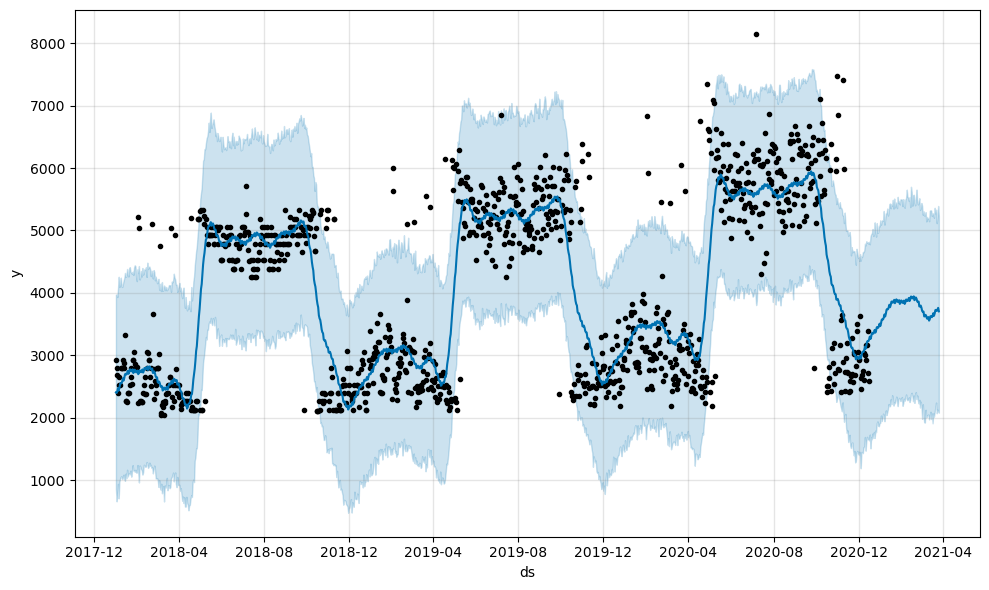

In [13]:
plot1 = model.plot(forecast)

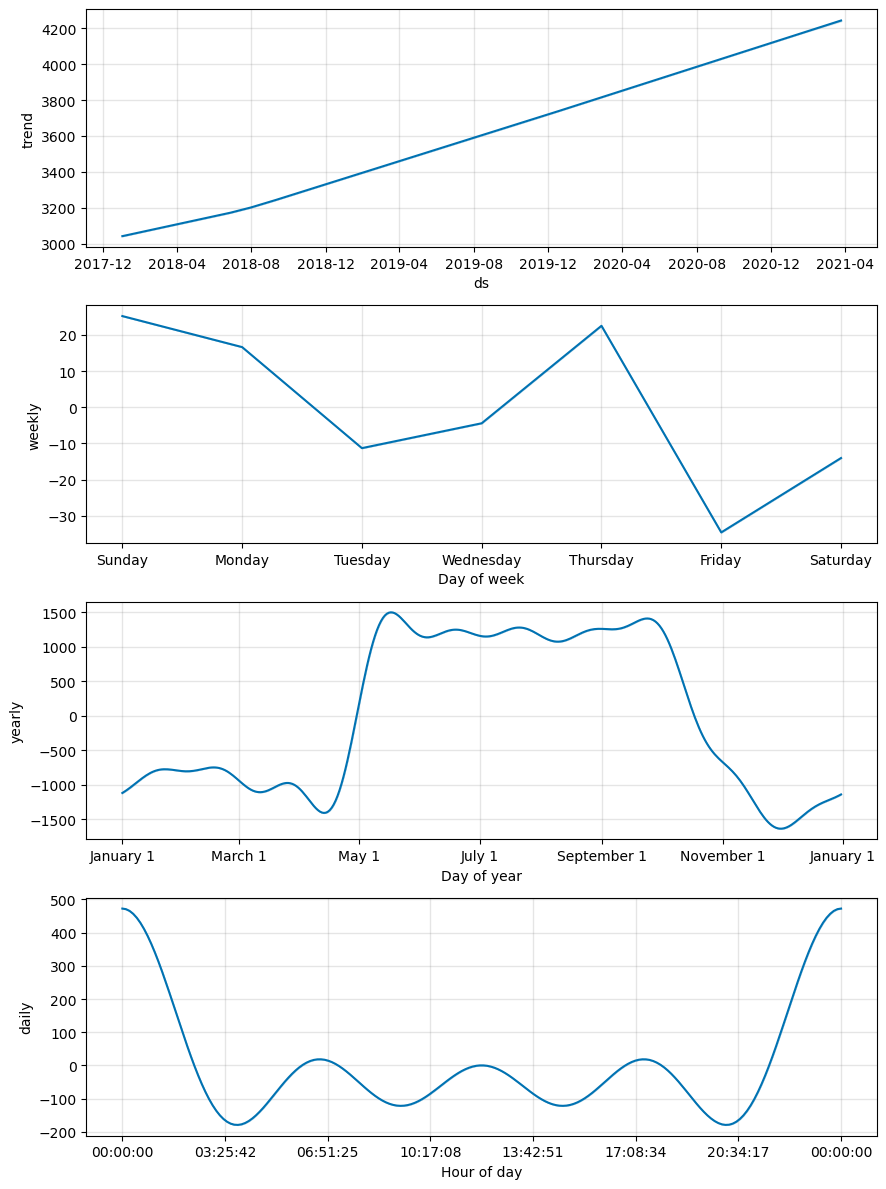

In [14]:
plot2 = model.plot_components(forecast)